In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("../RESULTS/predicciones.csv")

In [11]:
df["clase_predicha"].value_counts().sort_index()

clase_predicha
AVE_GRANDE          2
AVE_PEQUEÑA         1
MAMIFERO_GRANDE     2
MAMIFERO_MEDIANO    1
MAMIFERO_PEQUEÑO    1
Name: count, dtype: int64

<Axes: xlabel='clase_predicha'>

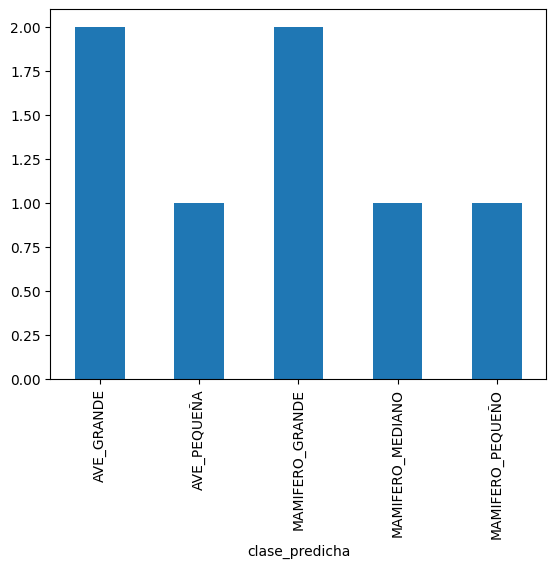

In [12]:
df["clase_predicha"].value_counts().sort_index().plot(kind='bar')

In [13]:
df_filter=df[df["clase_predicha"] == "MAMIFERO_MEDIANO"]

In [14]:
df_filter

,archivo,archivo_parent,clase_predicha,confianza
2,RESULTS/crops_clahe/DSCF0276_crop0.jpg,DATASET_PRUEBA/DSCF0276.JPG,MAMIFERO_MEDIANO,1.0


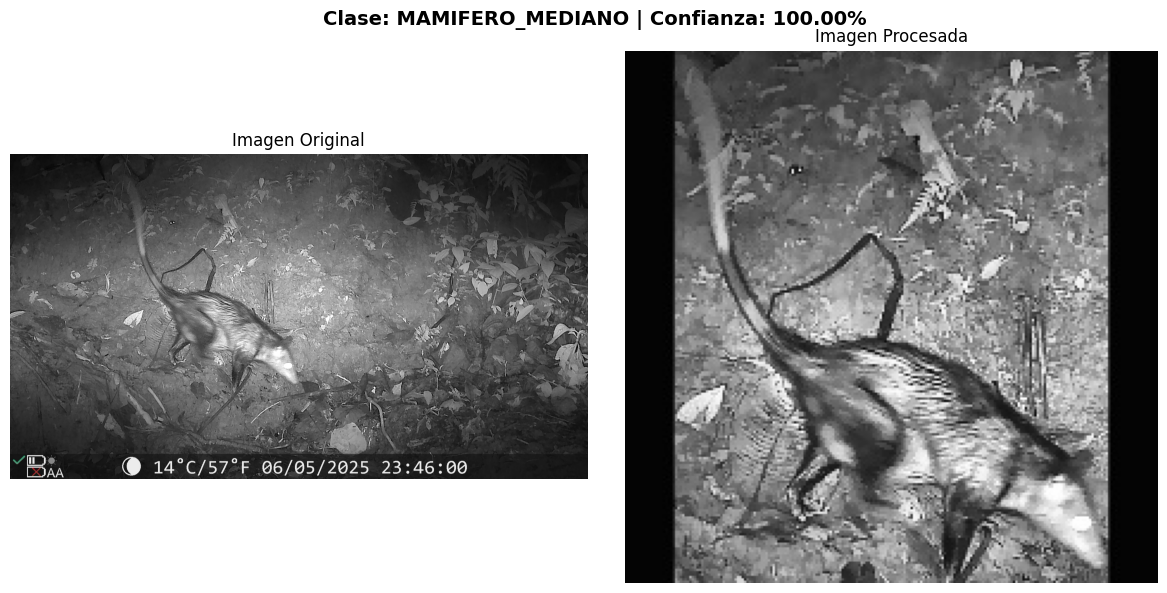

In [17]:
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

idx = 0

img = plt.imread(os.path.join("..",df_filter.iloc[idx]["archivo"]))
img_source = cv2.imread(os.path.join("..", df_filter.iloc[idx]["archivo_parent"]))

confianza = df_filter.iloc[idx]["confianza"]
clase = df_filter.iloc[idx]["clase_predicha"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"Clase: {clase} | Confianza: {confianza:.2%}", fontsize=14, fontweight='bold')

axes[0].imshow(cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB))
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(img)
axes[1].set_title("Imagen Procesada")
axes[1].axis('off')

plt.tight_layout()
plt.show()